# CMPE 260 Reinforcement Learning

## **Project: Live Trading Bot**

**Project Summary:**

Trading has become an important sector for investors to invest in. 

In order to earn profit from stocks or cryptocurrency,  the investor has to make sure to dedicate enough time by checking the market rates for these stocks. investors cannot dedicate 24 hours to monitoring the market. This reduces their chances of doing a profitable transaction at any given point of time. 

Various aspects that restraining the efficacy of humans in trading in several ways. 

1.   The reaction time of the investors. 
2.   Price fluctuation


**Team Members:**

Akanksha Rawat

Karishma Kuria

Nisha Mohan Devadiga

### Install necessary libararies

In [1]:
!pip install stable_baselines3 wandb mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 2.1 MB/s 
     |████████████████████████████████| 1.9 MB 19.9 MB/s 
     |████████████████████████████████| 71 kB 5.4 MB/s 
     |████████████████████████████████| 1.5 MB 73.9 MB/s 
     |████████████████████████████████| 168 kB 60.1 MB/s 
     |████████████████████████████████| 182 kB 85.4 MB/s 
     |████████████████████████████████| 63 kB 964 kB/s 
     |████████████████████████████████| 168 kB 21.5 MB/s 
     |████████████████████████████████| 166 kB 13.1 MB/s 
     |████████████████████████████████| 166 kB 53.5 MB/s 
     |████████████████████████████████| 162 kB 54.3 MB/s 
     |████████████████████████████████| 162 kB 63.7 MB/s 
     |████████████████████████████████| 158 kB 30.4 MB/s 
     |████████████████████████████████| 157 kB 48.5 MB/s 
     |████████████████████████████████| 157 kB 67.9 MB/s 
     |██████████████████████████████

## Import necessary libraries

In [2]:
import pandas as pd
import glob

##Cloning the github repository - Reinforcement-learning-Live-Trading for DEMO.

In [ ]:
#rm -rf /content/Reinforcement-learning-Live-Trading/Reinforcement-learning-Live-Trading

In [3]:
!git clone https://github.com/NishaMDev/Reinforcement-learning-Live-Trading.git

Cloning into 'Reinforcement-learning-Live-Trading'...
remote: Enumerating objects: 520, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 520 (delta 6), reused 0 (delta 0), pack-reused 502
Receiving objects: 100% (520/520), 22.44 MiB | 18.85 MiB/s, done.
Resolving deltas: 100% (230/230), done.


## Read Stock data for AAPL and merge them into one dataset.

Change the directory

In [4]:
cd /content/Reinforcement-learning-Live-Trading

/content/Reinforcement-learning-Live-Trading


Merge all the stock data for AAPL into final csv file for learning.

In [ ]:
df = pd.concat([pd.read_csv(f, sep=',') for f in glob.glob('data' + "/AAPL_2*.csv")],
                      ignore_index=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,11/18/2019,66.45,66.86,66.06,66.78,"86,803,600"
1,11/15/2019,65.92,66.45,65.75,66.44,"100,374,680"
2,11/14/2019,65.94,66.22,65.53,65.66,"89,582,244"
3,11/13/2019,65.28,66.20,65.27,66.12,"103,270,360"
4,11/12/2019,65.39,65.70,65.23,65.49,"87,388,920"


In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

Convert data field as datetime.

In [ ]:
df['Date'] = pd.to_datetime(df ['Date'])

In [ ]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-18,66.45,66.86,66.06,66.78,"86,803,600"
1,2019-11-15,65.92,66.45,65.75,66.44,"100,374,680"
2,2019-11-14,65.94,66.22,65.53,65.66,"89,582,244"
3,2019-11-13,65.28,66.20,65.27,66.12,"103,270,360"
4,2019-11-12,65.39,65.70,65.23,65.49,"87,388,920"


We need to convert the values from string to float type. Otherwise, it won't work.

In [ ]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-18,66.45,66.86,66.06,66.78,86803600.0
1,2019-11-15,65.92,66.45,65.75,66.44,100374680.0
2,2019-11-14,65.94,66.22,65.53,65.66,89582244.0
3,2019-11-13,65.28,66.20,65.27,66.12,103270360.0
4,2019-11-12,65.39,65.70,65.23,65.49,87388920.0


In [ ]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [ ]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume
250,2018-11-19,47.50,47.68,46.25,46.47,167683484.0
249,2018-11-20,44.59,45.37,43.88,44.25,271301000.0
248,2018-11-21,44.93,45.07,44.14,44.20,124496844.0
247,2018-11-23,43.74,44.15,43.03,43.07,94495884.0
246,2018-11-26,43.56,43.74,42.57,43.66,179994080.0


In [ ]:
df.to_csv('data/AAPl.csv',index=False)

In [ ]:
new_df = pd.read_csv('data/AAPL.csv')
new_df

,Date,Open,High,Low,Close,Volume
0,2018-11-19,47.50,47.68,46.25,46.47,167683484.0
1,2018-11-20,44.59,45.37,43.88,44.25,271301000.0
2,2018-11-21,44.93,45.07,44.14,44.20,124496844.0
3,2018-11-23,43.74,44.15,43.03,43.07,94495884.0
4,2018-11-26,43.56,43.74,42.57,43.66,179994080.0
...,...,...,...,...,...,...
995,2022-10-28,148.20,157.50,147.82,155.74,164762406.0
996,2022-10-31,153.16,154.24,151.92,153.34,97943172.0
997,2022-11-01,155.08,155.45,149.13,150.65,80379352.0
998,2022-11-02,148.95,152.17,145.00,145.03,93604625.0


In [ ]:
pwd

'/content/Reinforcement-learning-Live-Trading'

## Stock-Trading Inferences by running different algorithms - 

# A - PPO ALgorithm - Proximal Policy Optimization(PPO).

PPO is a policy gradient method where policy is updated explicitly. We can write the objective function or loss function of vanilla policy gradient with advantage function.

### Experiment#1 - **PPO over 100000 steps**

Experiment PPO algo with default params - gamma=0.99 , learning_rate=0.0007 , ent_coef=0.4

/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)
wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cuda device
Logging to runs/1ued673f/PPO_1


/content/Reinforcement-learning-Live-Trading/env/stock_trading_env.py:104: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=1000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 3e+06    |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 3e+06    |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
-----------------------------
| time/              |      |
|    fps             | 121  |
|    iterations      | 1    |
|    time_elapsed    | 16   |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=3000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
-------------

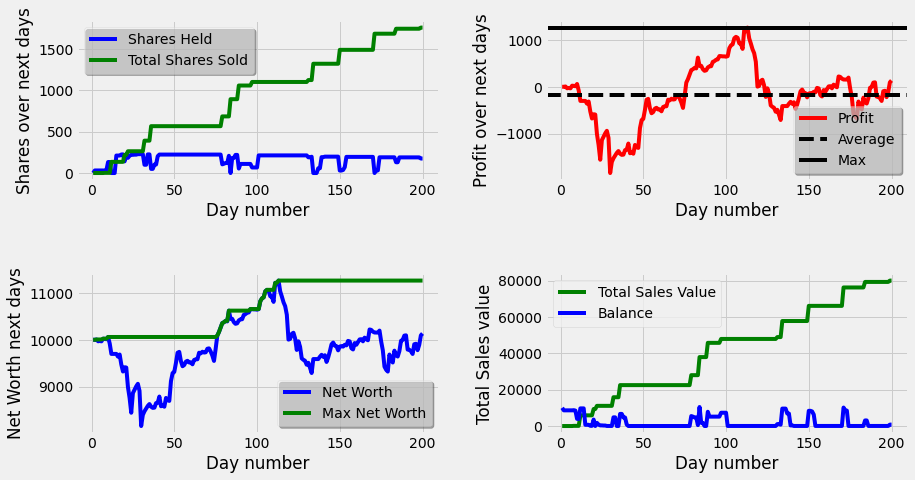

eval/mean_ep_length,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/mean_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
time/fps,█▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▁▁▁▁▁▁
train/approx_kl,█▂▁▄▂▅▁▂▂▂▃▂▄▂▂▃▂▂▄▂▄▅▃▃▂▂▁▃▃▂▂▄▅▃▂▁▂▃▂▂
train/clip_fraction,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/clip_range,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/entropy_loss,████▇█▇▇▇▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▃▂▂▂▁▁▁▁
train/explained_variance,▁█▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,▂▇▅▃▃▃▂▄▂▄▅▃▅▆▅▄▃▂▂▃▃▁▂▄▂▃▄▂▅▂▃▁▃▆▆▂▄▄▃█


In [ ]:
from stocktrade import Stocktrade

if __name__ == "__main__":
    timesteps = 100000
    algo = "PPO"
    Stocktrade.stocktrade(algo,timesteps)

### Experiment#2 - PPO over 100000 steps (Hyper Parameter Tuning)

**Experiment PPO algo with gamma=0.8 , learning_rate=0.0007 , ent_coef=0.3**

/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)
wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cuda device
Logging to runs/1olalpis/PPO_1


/content/Reinforcement-learning-Live-Trading/env/stock_trading_env.py:104: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=1000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 3e+06    |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 3e+06    |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
-----------------------------
| time/              |      |
|    fps             | 114  |
|    iterations      | 1    |
|    time_elapsed    | 17   |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=3000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
-------------

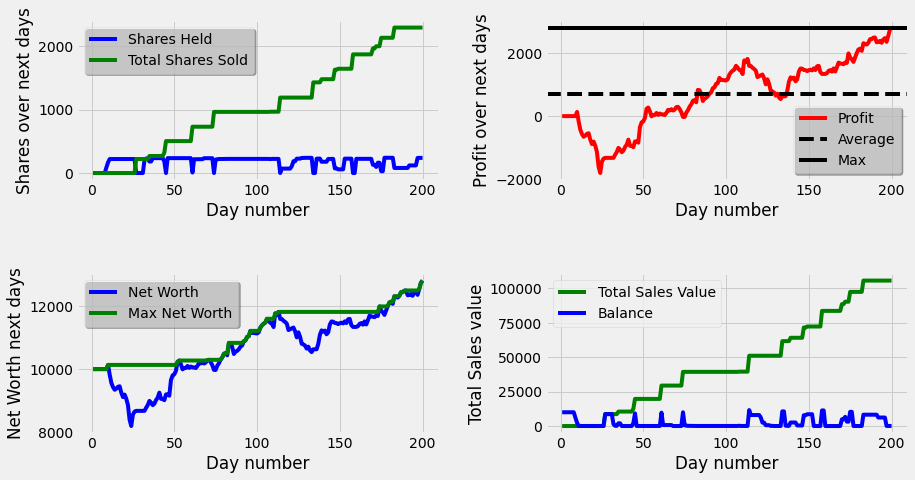

eval/mean_ep_length,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/mean_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
time/fps,█▆▃▃▂▃▃▂▂▃▃▃▃▃▃▃▃▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▂▂
train/approx_kl,▄▆▁▅▂▂▄▂▃▃▃▃▂▇▂▁▃▂▁▃▃▃▄▃▂▃▂▃▁▄▃▅█▁▁▁▁▂▂▂
train/clip_fraction,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/clip_range,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/entropy_loss,██▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
train/explained_variance,▁█▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,▃▄▂▁▃▁▄▄▂▃▁▂▃▂▂▅▂▇▁█▄▄▅▁▄▃▂▁▄▄▃▄▅▂▁▇▆▂▃▃


In [ ]:
#### 6.2  Running PPO algorithm over 100 time steps
from stocktrade1 import Stocktrade

if __name__ == "__main__":
    timesteps = 100000
    algo = "PPO"
    hyper_param = True
    Stocktrade.stocktrade(algo,timesteps,hyper_param)

# B - A2C Algorithm - Advantage Actor Critic (A2C)

A2C is a policy gradient algorithm and it is part of the on-policy family. That means that we are learning the value function for one policy while following it, or in other words, we can’t learn the value function by following another policy.

### Experiment#3 - Running A2C algorithm over 100 time steps

Experiment A2C algo with with default params - gamma=0.99 , learning_rate=0.0007 , ent_coef=0.4

wandb: Currently logged in as: nishamdev. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)
wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cuda device
Logging to runs/avambzoe/A2C_1


/content/Reinforcement-learning-Live-Trading/env/stock_trading_env.py:104: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


mean_reward:3003000.00 +/- 0.00


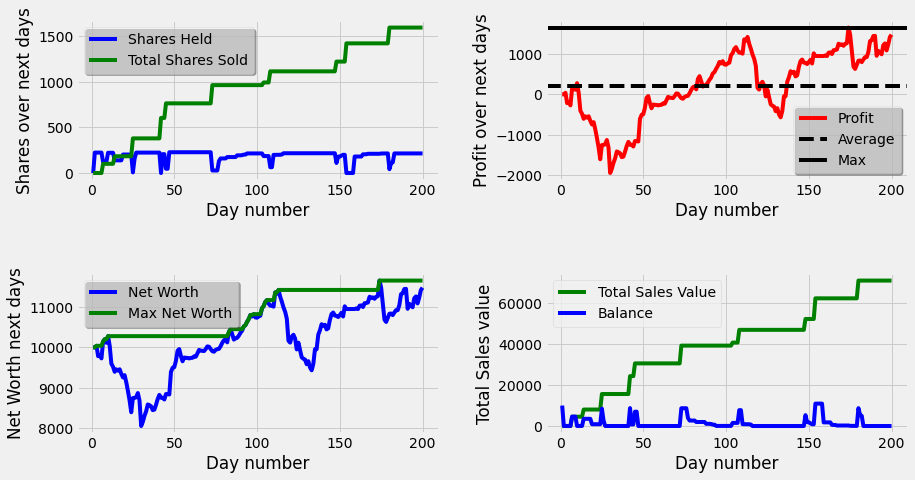

In [ ]:
from stocktrade import Stocktrade

if __name__ == "__main__":
    timesteps = 100
    algo = "A2C"
    Stocktrade.stocktrade(algo,timesteps)

### Experiment#4 - A2C over 100 steps (Hyper Parameter Tuning)

**Experiment A2C algo with gamma=0.8 , learning_rate=0.000010 , ent_coef=0.3**

/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)
wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cuda device
Logging to runs/2ngqb400/A2C_1


/content/Reinforcement-learning-Live-Trading/env/stock_trading_env.py:104: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


mean_reward:3003000.00 +/- 0.00


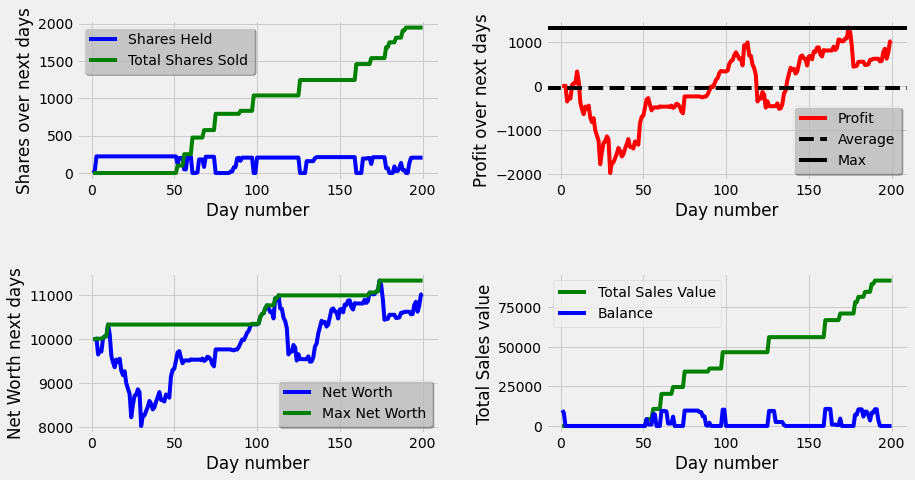

In [ ]:
#### 6.2  Running A2C algorithm over 100 time steps
from stocktrade1 import Stocktrade

if __name__ == "__main__":
    timesteps = 100
    algo = "A2C"
    hyper_param = True
    Stocktrade.stocktrade(algo,timesteps,hyper_param)

# C - SAC Algorithm - Soft Actor Critic (SAC) Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor.

Soft Actor Critic, or SAC, is an off-policy actor-critic deep RL algorithm based on the maximum entropy reinforcement learning framework. In this framework, the actor aims to maximize expected reward while also maximizing entropy. That is, to succeed at the task while acting as randomly as possible.



###Experiment#5 - Running SAC algorithm over 100 time steps

Experiment SAC algo with with default params - gamma=0.99 , learning_rate=0.0007 , ent_coef=0.4

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)


Using cuda device
Logging to runs/1vo0lb0d/SAC_1


/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


mean_reward:3003000.00 +/- 0.00


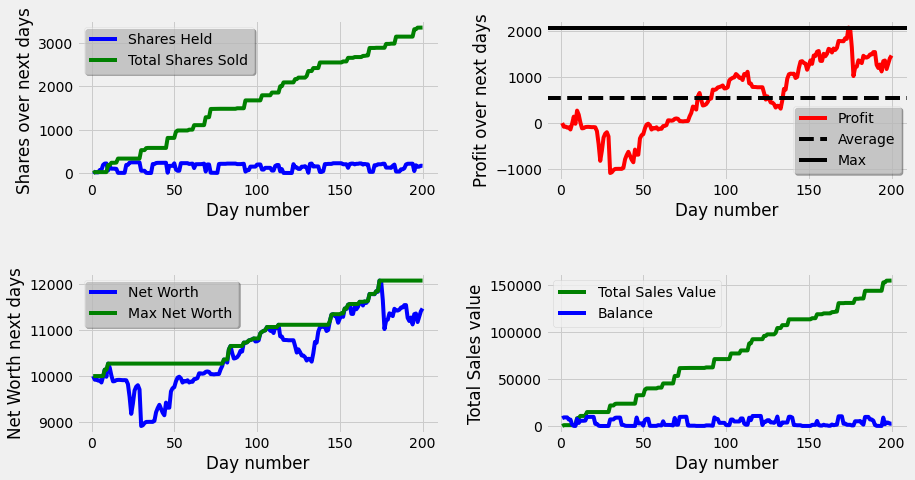

In [ ]:
#### 6.3 Running SAC algorithm over 100 time steps
from stocktrade import Stocktrade

if __name__ == "__main__":
    timesteps = 100
    algo = "SAC"
    Stocktrade.stocktrade(algo,timesteps)

###Experiment#6 - A2C over 100 steps (Hyper Parameter Tuning)

**Experiment SAC algo with gamma=0.8 , learning_rate=0.000010 , ent_coef=0.3**

/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)


Using cuda device


wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Logging to runs/341l5xih/SAC_1


/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


mean_reward:3003000.00 +/- 0.00


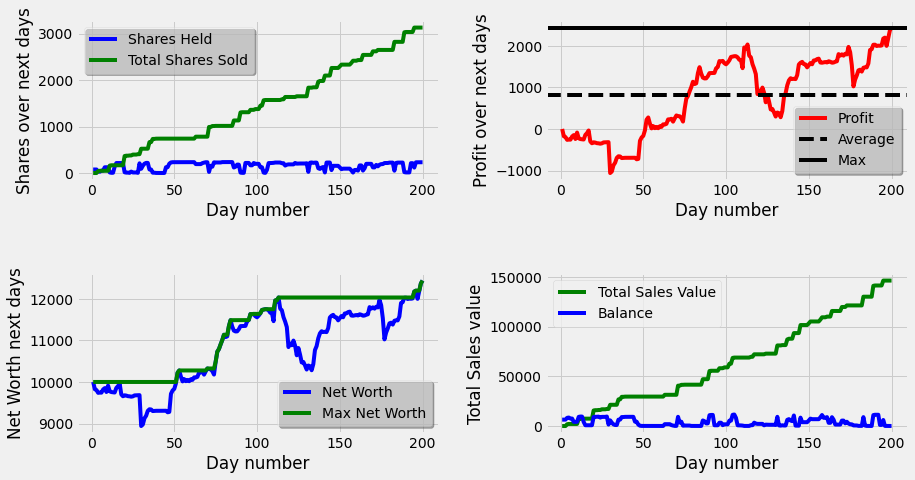

In [ ]:
from stocktrade1 import Stocktrade

if __name__ == "__main__":
    timesteps = 100
    algorithm = "SAC"
    hparam = "T"
    Stocktrade.stocktrade(algorithm,timesteps,hparam)

##Run this first to hyperparamer experiments

In [5]:
%%writefile /content/Reinforcement-learning-Live-Trading/stocktrade1.py

"""
Final Project: Stock Trading -Reinforcement Learning
Author: Nisha Mohan Devadiga
        Akanksha Rawat
        Karishma Kuria.
"""
import argparse
import sys
# from stable_baselines3.common.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO, A2C , SAC

from stable_baselines3.common.callbacks import CallbackList, CheckpointCallback
from stable_baselines3.common.callbacks import EvalCallback 
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

import pandas as pd
import wandb
from wandb.integration.sb3 import WandbCallback
from env.stock_trading_env import StockTradingEnv


TOTAL_TIMESTEPS = 100000 # 1000000 for PPO, 100 for A2C , 100 for SAC 

class Stocktrade:
    
    def stocktrade(algo,timesteps,hparam ):
    
        config = {
             "policy_type": "MlpPolicy",
             "total_timesteps": timesteps,
             "learning_rate": 0.01,
              "momentum" : 0.2,
              "env_name": "stock-v0",
             }
         
         # Initialize wandb
        run = wandb.init(
               project="StockTrading",
               config=config,
               sync_tensorboard=True,  # auto-upload StockTrading's tensorboard metrics
               monitor_gym=True,  # auto-upload the videos of agents playing the game
               save_code=True,  # optional
             )
     
        # Load data
        df = pd.read_csv('./data/AAPL.csv')
        df = df.sort_values('Date')
     
        # The algorithms require a vectorized environment to run
        env = DummyVecEnv([lambda: StockTradingEnv(df)])
         
         # env = make_vec_env([lambda: StockTradingEnv(df)],n_envs=10)
         # print("Check env: ",check_env(StockTradingEnv(df)))
         
         # Instantiate the agent model
        if algo == "PPO":
          if hparam == "T":
               model = PPO(config["policy_type"],env,gamma=0.80,learning_rate=0.000010,ent_coef=0.3, verbose=1, tensorboard_log=f"runs/{run.id}")
          else: 
               model = PPO(config["policy_type"],env, verbose=1, tensorboard_log=f"runs/{run.id}")
     
        elif algo == "A2C":
          if hparam == 'T':
             model = A2C(config["policy_type"],env,gamma=0.80 , learning_rate=0.000010 , ent_coef=0.3,verbose=1, tensorboard_log=f"runs/{run.id}")
          else:
             model = A2C(config["policy_type"],env, verbose=1, tensorboard_log=f"runs/{run.id}")
                
        elif algo == "SAC":
          policy_kwargs = dict(net_arch=dict(pi=[64, 64], qf=[400, 300]))

          if hparam == 'T':
             model = SAC(config["policy_type"], env, gamma=0.80 , learning_rate=0.000010 , ent_coef=0.3, policy_kwargs=policy_kwargs, verbose=1,tensorboard_log=f"runs/{run.id}" )
          else:
             model = SAC(config["policy_type"], env, policy_kwargs=policy_kwargs, verbose=1,tensorboard_log=f"runs/{run.id}" )

        else:
             print("Program Terminated. Please enter valid algorithm - PPO / A2C / SAC")
             sys.exit()
     
        checkpoint_callback = CheckpointCallback(save_freq=1e4, save_path='./model_checkpoints/')
        eval_callback = EvalCallback(env,
                                      best_model_save_path=f"./model_checkpoints/best_model/",
                                      log_path="./logs/results",
                                      eval_freq=1000,verbose=1)
        wandb_callback = WandbCallback(
             model_save_path=f"models/{run.id}",
                         # gradient_save_freq=1000
             verbose=1,
             )
         # Create the callback list
        callback = CallbackList([checkpoint_callback, eval_callback,wandb_callback])
         
         # Train the agent
        model.learn(
             total_timesteps=config["total_timesteps"],
             callback=callback,
             )
         # print rewards
        mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
        print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
     
        obs = env.reset()
     
        for i in range(200):
             action, _states = model.predict(obs)
             obs, rewards, done, info = env.step(action)
             env.render(mode='file')
        env.render(mode='static')
        run.finish()


if __name__ == '__main__':
    # Initialize parser
    parser = argparse.ArgumentParser(description='Stock Trade Inference')
    parser.add_argument('-a', "--algorithm", type=str, required=True,
                        default="PPO", help="mention algorithm  - PPO / A2C / SAC")
    parser.add_argument('-t', "--timesteps", type=int, required=True,
                        default="PPO", help="enter timesteps")
    parser.add_argument('-h', "--hparam", type=str, required=True,
                        default="F", help="enter T/F")
    args = parser.parse_args()
    algo = args.algorithm
    timesteps = args.timesteps
    hparam = args.hparam
    print("hparam:", hparam)
    Stocktrade.stocktrade(algo,timesteps,hparam)

Writing /content/Reinforcement-learning-Live-Trading/stocktrade1.py
